In [35]:
# import the scipy and check the version to be sure that the version is above 1.6.1.
import scipy
scipy.__version__

'1.13.1'

In [36]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

In [37]:
# Importing the excel file
df = pd.read_csv("C:\\Users\\moham\\Downloads\\Great Learning\\Week7\\abtest.csv")

In [38]:
# Like any other analysis and AB Testing, I would want to explore the data to get familiar with what it is I am dealing with. 

In [39]:
# Checking out the top and bottom five rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [40]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [41]:
# Now, let's have a look at how many rows and columns we have in the data
df.shape

(100, 6)

In [42]:
# Now, let's have a look at the data type of columns to see what our data is composed of.
df.info()
# We have four columns that are categorical and two columns that are numerical. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [43]:
# Now, let's have a look at the statics of our data
# The following function includes stats for numberical data. 
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [44]:
# We can opt in to include categorial data too. (include='all'), but is not necessary to do that. 
df.describe(include='all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


In [45]:
# Now, let's see if we have any missing data in our rows. 
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [46]:
# This concludes that we shall not worry about getting any incorrect results due to missing values. 

In [47]:
# Now, let's see if there is any duplicate rows in our data. 
# I want to do it in two different ways. 

# First method by defining a duplicate function

def has_duplicates(df):
    """
    Checks if a list or other iterable has duplicate elements.

    Args:
        data: The list or iterable to check.

    Returns:
        True if duplicates exist, False otherwise.
    """
    return len(set(df)) != len(df)

""" This next print statement returns true because it is looking at data to see if there ANY duplicates evern if that duplicates means 
we someone has more than one preferred language in this case. It was a good lesson to learn. 
"""
print(has_duplicates(df)) 

if has_duplicates(df.index): # Pass df.index to check for duplicate rows
    print("There are duplicates in the data.")
else:
    print("No duplicates found.")
if has_duplicates(df.index):
    print("There are duplicates in the data.")
else:
    print("No duplicates found.")




True
No duplicates found.
No duplicates found.


In [48]:
# let'see if our data has duplicates or not. 
duplicates= df.duplicated().sum()
print(duplicates)

0


In [49]:
# Now, let's work on the bivariate and univariate analysis through some charts. 


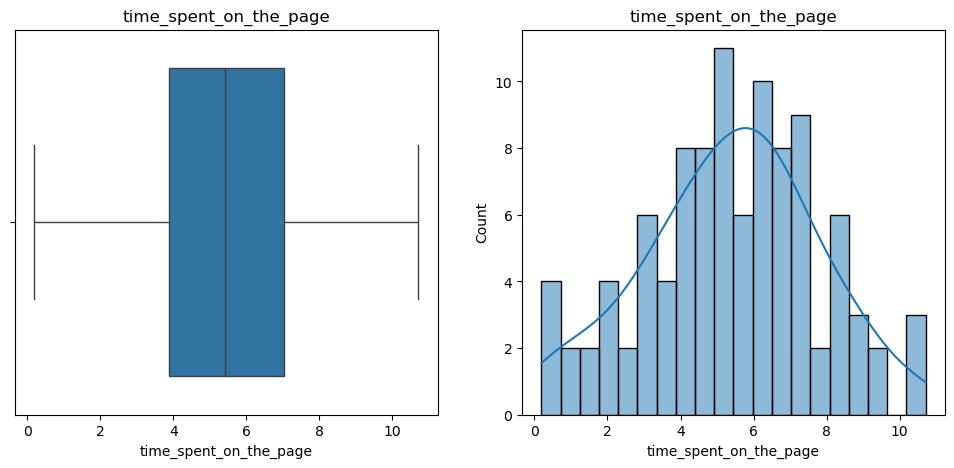

In [50]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Box Plot
sns.boxplot(data=df, x='time_spent_on_the_page', ax=axes[0])
axes[0].set_title("time_spent_on_the_page")

# Histogram
sns.histplot(data=df, x='time_spent_on_the_page', bins=20, kde=True, ax=axes[1])
axes[1].set_title("time_spent_on_the_page")

# Show the plots
plt.show()

In [51]:
# The above visualizations indicate that there is almost a normal distribution in the data for the time spend on the page. 

In [52]:
# Next: we want to look at the value counts of the categorical columns and visualize them. 
df['group'].value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

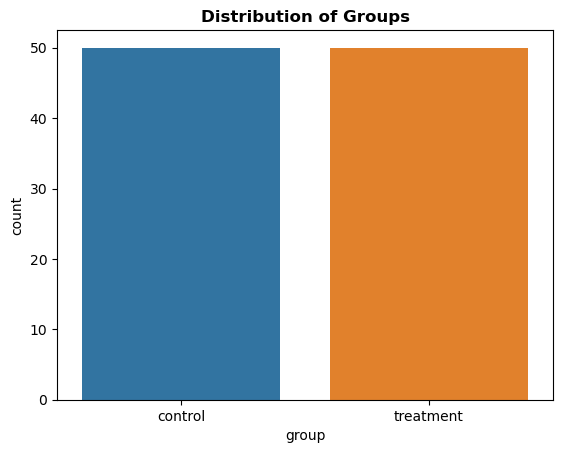

In [53]:
sns.countplot(data=df, x='group', hue="group")
plt.title("Distribution of Groups", fontsize=12, fontweight='bold') 
plt.show()

In [54]:
df['landing_page'].value_counts()

landing_page
old    50
new    50
Name: count, dtype: int64

C:\Users\moham\AppData\Local\Temp\ipykernel_23528\1227258890.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='landing_page', palette="coolwarm")


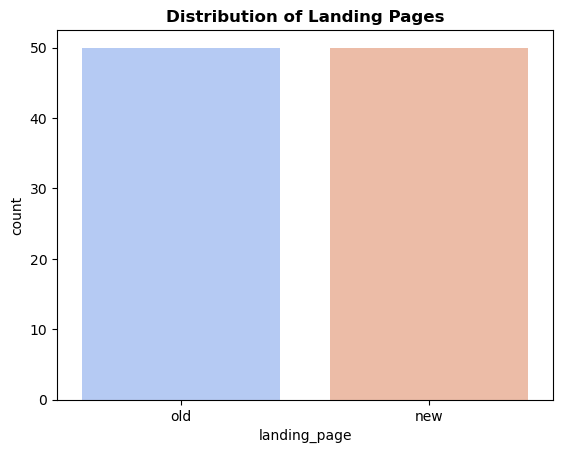

In [55]:
# We visualize the landing page distribution. 
sns.countplot(data=df, x='landing_page', palette="coolwarm")
# sns.countplot(data=df, x='landing_page', hue="landing_page")
plt.title("Distribution of Landing Pages", fontsize=12, fontweight='bold') 

plt.show()

In [56]:
df['converted'].value_counts()

converted
yes    54
no     46
Name: count, dtype: int64

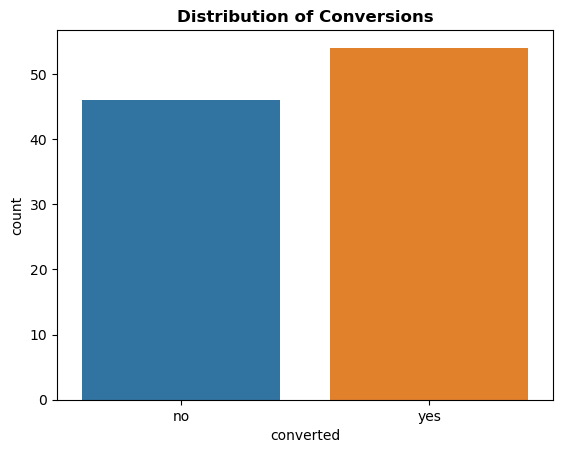

In [57]:
# We visualize the conversion's distribution. 
sns.countplot(data=df, x='converted', hue="converted")
# sns.countplot(data=df, x='landing_page', hue="landing_page")
plt.title("Distribution of Conversions", fontsize=12, fontweight='bold') 

plt.show()

In [58]:
df['language_preferred'].value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

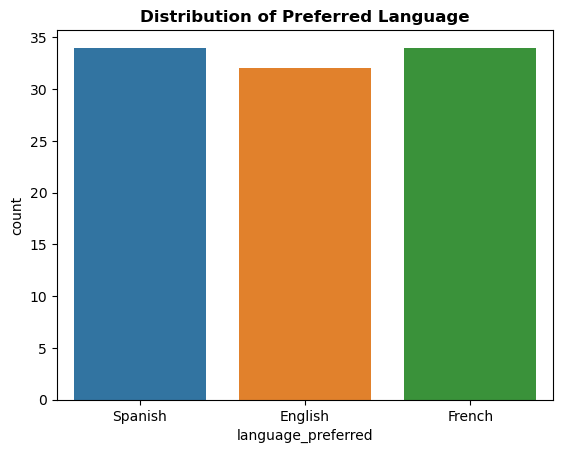

In [59]:
# We visualize the preferred languages' distribution. 
sns.countplot(data=df, x='language_preferred', hue="language_preferred")
# sns.countplot(data=df, x='landing_page', hue="landing_page")
plt.title("Distribution of Preferred Language", fontsize=12, fontweight='bold') 

plt.show()

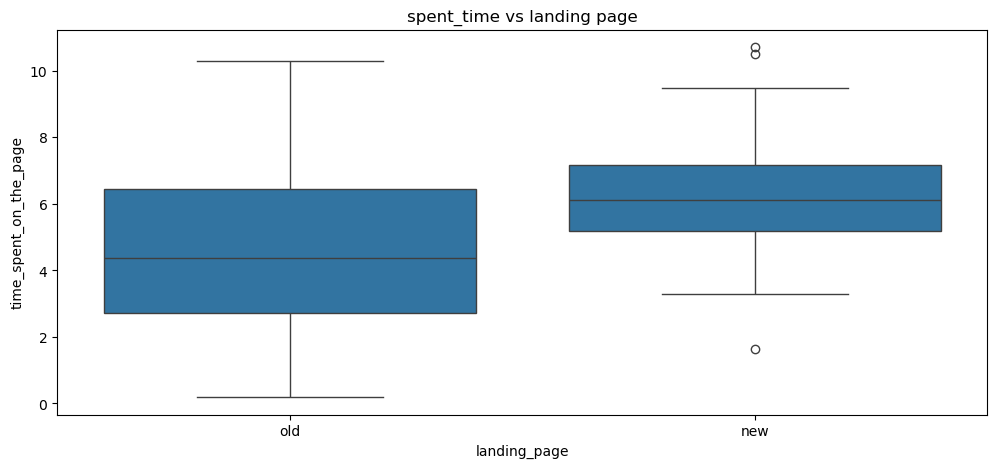

In [60]:
# We, now, compare landing page and the time spent on them. 
plt.figure(figsize=(12, 5))

# Box Plot
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page')
plt.title("spent_time vs landing page")
plt.show()

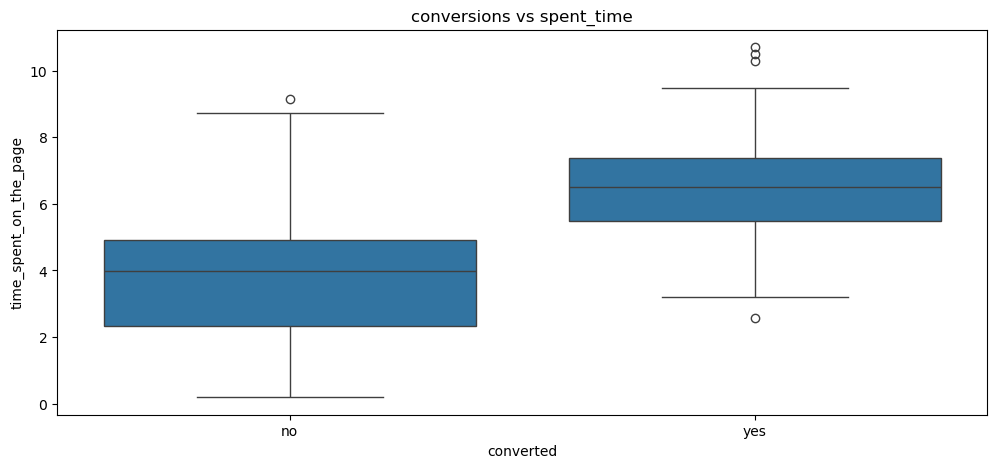

In [61]:
# We, now, compare conversions and time spent on the new page. 
plt.figure(figsize=(12, 5))

# Box Plot
sns.boxplot(data=df, x='converted', y='time_spent_on_the_page')
plt.title("conversions vs spent_time")
plt.show()

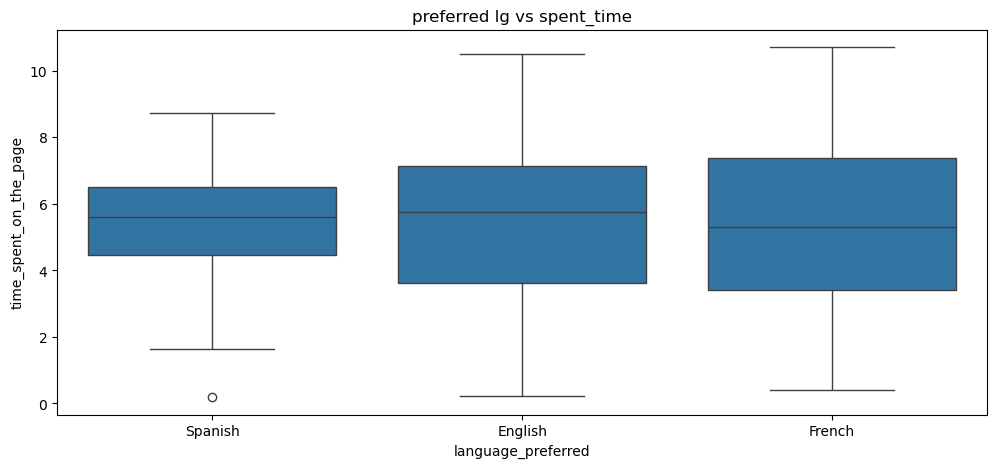

In [70]:
# We, now, compare the time spent on the newly created page based on preferred languages. 
plt.figure(figsize=(12, 5))

# Box Plot
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page')
plt.title("preferred lg vs spent_time")
plt.show()

In [63]:
# Now, let's answer the posed questions. 
# 1. Do the users spend more time on the new landing page than the existing landing page?
# Null hyp: They spend equal time on each page. 
# Alt hyp: They spend more time on the new landing page. 

Time_Spent_Newpage= df[df['landing_page']=='new']['time_spent_on_the_page']
# time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
Time_Spent_oldpage= df[df['landing_page']=='old']['time_spent_on_the_page']
print('Time spend on the new page is:', round(Time_Spent_Newpage.std(),2) )
print('Time spend on the old page is:', round(Time_Spent_oldpage.std(), 2))

Time spend on the new page is: 1.82
Time spend on the old page is: 2.58


In [64]:
# Q 1 requires a t test with two independent samples to find out the truth. 

#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(Time_Spent_Newpage, Time_Spent_oldpage, equal_var = True, alternative = 'two-sided')
print('The p-value is ' + str(round(p_value,5)))

The p-value is 0.00026


In [65]:
if p_value< .05:
    print('There is significant evidence to reject the null hypothesis')
else:
    print('There is not signficant evident to reject the null hypothesis')

There is significant evidence to reject the null hypothesis


In [66]:
""" Question 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? """
# null hypothesis: The conversion rate for the new landing page is the same as the old one. 
# Alt hyp: The conversion rate for the new page is greater than the old page. 

' Question 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? '

In [74]:
# We would need to use a chi test here because we're dealing with categorical data. 
import pandas as pd
from scipy.stats import chi2_contingency

# df1 = pd.DataFrame(df)

# Create a contingency table
contingency_table = pd.crosstab(df['landing_page'], df['converted'], normalize= 'index')
print(contingency_table)

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)

converted       no   yes
landing_page            
new           0.34  0.66
old           0.58  0.42
Chi-Square Statistic: 0.0
P-value: 1.0


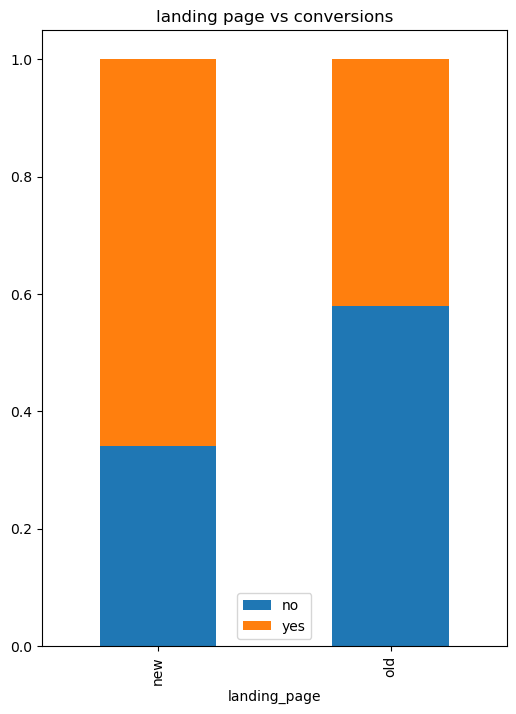

In [76]:
# let's visually compare the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.title("landing page vs conversions")
plt.show()

In [82]:
# calculate the number of converted users in the treatment group
# newly_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
newly_converted = df[df['group'] == 'treatment']['converted'].get('yes', 0)
# calculate the number of converted users in the control group
# old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] 
old_converted = df[df['group'] == 'control']['converted'].value_counts().get('yes', 0)
# adding get('yes', 0) helps to avoid getting an error if there is no yes/no in the column.

num_control = df.group.value_counts()['control'] # total number of users in the control group
num_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(num_control, num_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


In [84]:
# The question is asking to find out the proportion of those who visited the newly created page and became subscribers. 
# So, we need to use a proportions_ztest because we already have all the values. 
from statsmodels.stats.proportion import proportions_ztest

# write the code to calculate the p-value
test_stat, p_value = proportions_ztest([newly_converted, old_converted] , [num_treatment, num_control], alternative ='two-sided') 


print('The p-value is', p_value)

The p-value is 2.525497122538792e-07


In [86]:
if p_value< .05:
    print('There is significant evidence to reject the null hypothesis')
else:
    print('There is not signficant evident to reject the null hypothesis')

There is significant evidence to reject the null hypothesis


In [88]:
# 3. Does the converted status depend on the preferred language?

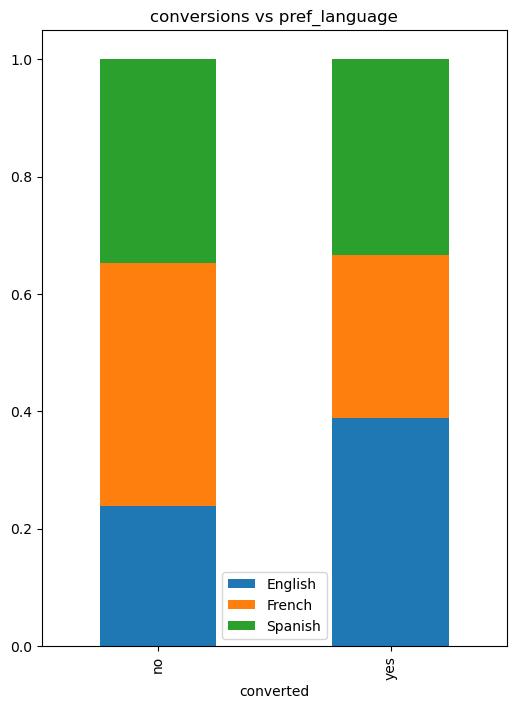

In [90]:
# We need to use a crosstable so that we can visually plot the dependency between conversion status and preferred langauge
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.title("conversions vs pref_language")
plt.show()


In [92]:
# 3. Does the converted status depend on the preferred language?
# H0: Yes, it does. 

# Ha: No, it doesn't. 

# Since we are dealing with categorical data. We need to use the chi test. 
# We create a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['converted'], df['language_preferred'], normalize='index')
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,0.239130,0.413043,0.347826
yes,0.388889,0.277778,0.333333


In [94]:
# importing the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('The p-value is', round(p_value,2))

The p-value is 0.97


In [96]:
if p_value< .05:
    print('There is significant evidence to reject the null hypothesis')
else:
    print('There is not signficant evident to reject the null hypothesis')

There is not signficant evident to reject the null hypothesis


In [98]:
# Q 4. Is the time spent on the new page same for the different language users?

In [100]:
# Let's create a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

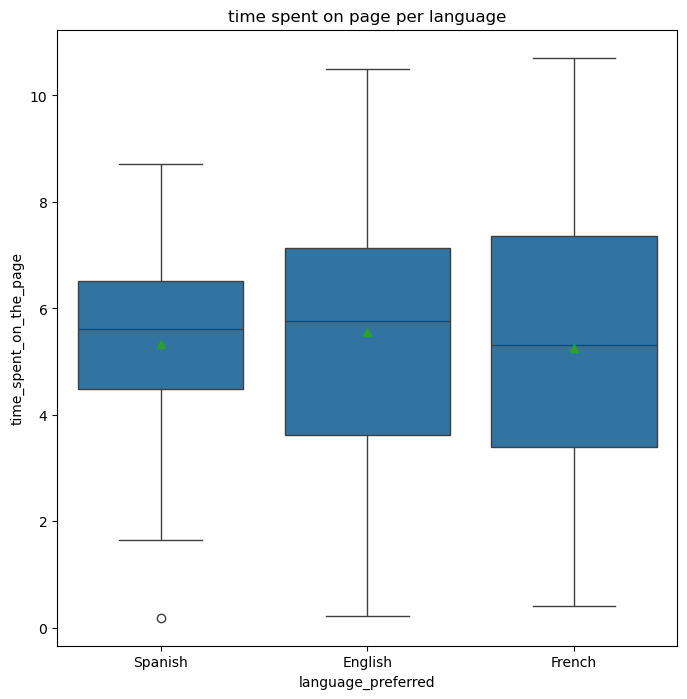

In [102]:
# Let's visually plot the time spent on the new page for different language users
plt.figure(figsize=(8,8))
sns.boxplot(x = df['language_preferred'], y = df['time_spent_on_the_page'], showmeans = True, data = df_new)
plt.title("time spent on page per language")
plt.show()


In [104]:
# Now, let's calculate the mean time spent on the new page for different language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()



language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

In [106]:
# Let's define the null and alt hypotheses:

In [108]:
# H0: They all spend them same amount of time on the new page. 

# Ha: One of the languages is being used more than the other to visit the new landing page.

In [110]:
# Let's create a subsetted data frame of the time spent on the new page by English language users
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# Let's create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']   
time_spent_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']  

In [112]:
from scipy.stats import levene

# write the code to calculate the p-value
test_stat, p_value = levene(time_spent_English, time_spent_French, time_spent_Spanish)   
print('The p-value is', p_value)

The p-value is 0.46711357711340173


In [114]:
if p_value< .05:
    print('There is significant evidence to reject the null hypothesis')
else:
    print('There is not signficant evident to reject the null hypothesis')

There is not signficant evident to reject the null hypothesis


In [116]:

# Conclusion:

# 1. Do the users spend more time on the new landing page than the existing landing page?
# Yes, they do. 

""" 2. Is the conversion rate (the proportion of users who visit the landing page and get converted)
for the new page greater than the conversion rate for the old page?"""
# Yes, the conversion rate for the new page is greater than the old page. 

# 3. Is the conversion and preferred language are independent or related?
# No, they are not dependent.  

# 4. Is the time spent on the new page same for the different language users?
# No, it is not. 

' 2. Is the conversion rate (the proportion of users who visit the landing page and get converted)\nfor the new page greater than the conversion rate for the old page?'

In [118]:
#Business Recommendations
# It is recommended that the company uses the newly created landing page as it leads to more conversions. 